# Solving an ODE

$$
\begin{aligned}
y'(x) &= y(x)\\
y(0) &= 1
\end{aligned}
$$
with the exact solution:
$$
y(x) = e^{x}
$$

In [1]:
import torch

In [2]:
x = torch.linspace(0, 1, 100, requires_grad=True)
print(x.shape)

torch.Size([100])


In [3]:
x = x.reshape(-1, 1)
print(x.shape)

torch.Size([100, 1])


In [4]:
from torch import nn

mlp = nn.Sequential(
    nn.Linear(1, 10),
    nn.Tanh(),
    nn.Linear(10, 20),
    nn.Tanh(),
    nn.Linear(20, 1),
)

In [5]:
from torch import optim

optimizer = optim.Adam(list(mlp.parameters()), lr=0.01)

In [6]:
def dy_dx(y, x):
    return torch.autograd.grad(
        y, x, grad_outputs=torch.ones_like(y), create_graph=True
    )[0]

In [7]:
losses = []

for i in range(500):
    y = mlp.forward(x)
    y_p = dy_dx(y, x)

    residual = y_p - y

    initial = y[0] - 1

    loss = (residual**2).mean() + initial**2

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.detach().numpy()[0])

    if i % 10 == 0:
        print("Epoch %3d: Current loss: %.2e" % (i, losses[-1]))

Epoch   0: Current loss: 1.11e+00
Epoch  10: Current loss: 4.84e-01
Epoch  20: Current loss: 3.64e-01
Epoch  30: Current loss: 3.22e-01
Epoch  40: Current loss: 2.84e-01
Epoch  50: Current loss: 2.53e-01
Epoch  60: Current loss: 2.26e-01
Epoch  70: Current loss: 1.95e-01
Epoch  80: Current loss: 1.42e-01
Epoch  90: Current loss: 3.53e-02
Epoch 100: Current loss: 1.32e-02
Epoch 110: Current loss: 5.68e-03
Epoch 120: Current loss: 2.11e-03
Epoch 130: Current loss: 9.00e-04
Epoch 140: Current loss: 5.60e-04
Epoch 150: Current loss: 4.56e-04
Epoch 160: Current loss: 4.15e-04
Epoch 170: Current loss: 3.85e-04
Epoch 180: Current loss: 3.58e-04
Epoch 190: Current loss: 3.34e-04
Epoch 200: Current loss: 3.12e-04
Epoch 210: Current loss: 2.91e-04
Epoch 220: Current loss: 2.71e-04
Epoch 230: Current loss: 2.52e-04
Epoch 240: Current loss: 2.34e-04
Epoch 250: Current loss: 2.17e-04
Epoch 260: Current loss: 2.01e-04
Epoch 270: Current loss: 1.85e-04
Epoch 280: Current loss: 1.71e-04
Epoch 290: Cur

In [8]:
x_test = torch.linspace(0, 1, 31).reshape(-1, 1)
exact = torch.exp(x_test)
predict = mlp.forward(x_test).detach().numpy()
error = exact - predict

MAE = torch.abs(error).mean()

print("Mean Absolute Error: %.2e" % MAE)

Mean Absolute Error: 3.86e-04


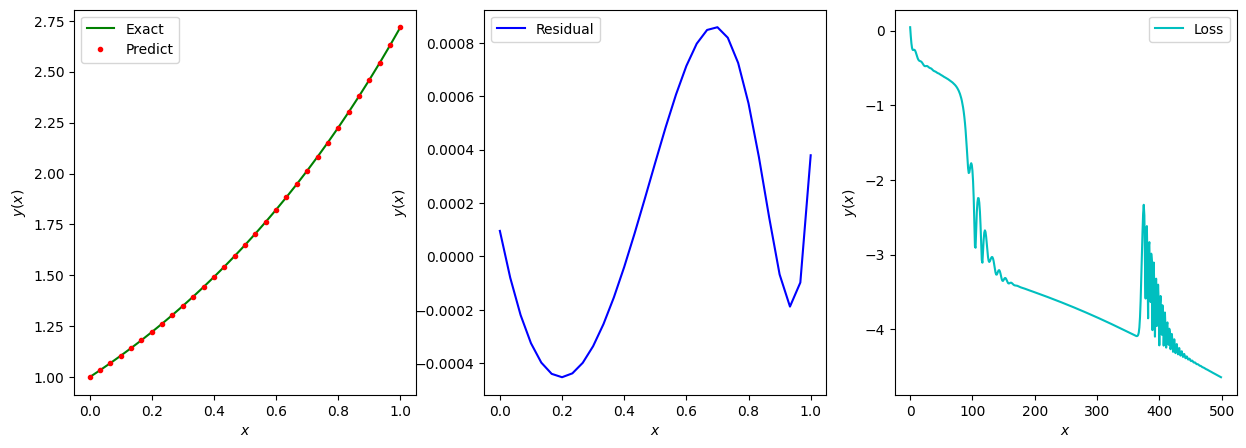

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(x_test, exact, "g-", label="Exact")
axs[0].plot(x_test, predict, "r.", label="Predict")

axs[1].plot(x_test, error, "b", label="Residual")

axs[2].plot(np.log10(losses), "c", label="Loss")

for ax in axs:
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y(x)$")
    ax.legend()